# Airline Fare Prediction

### Completed by: Tharindu Yakkala
### Personal Project

# Data load

In [1]:
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#validation
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("airline_data.csv")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Removing missing values

In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
idx = df.Route.isna()
df[idx]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Feature extraction of dates and arrival times

In [10]:
# date of journey
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

In [11]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

In [12]:
#departure and arrival time extraction
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Min'] = df['Dep_Time'].dt.minute
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Min'] = df['Arrival_Time'].dt.minute

In [13]:
remove = ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']
df = df.drop(remove, axis=1)

In [14]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


## Feature extraction of Duration to minutes

In [15]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [16]:
df['Duration'] = df['Duration'].str.replace('h','*60')

In [17]:
df['Duration'] = df['Duration'].str.replace(r'(\d\*\d+\s)(\d+)+m', r'\1+\2', regex=True)
df['Duration'] = df['Duration'].str.replace('m', '')
df['Duration'] = df['Duration'].str.replace(" ", "")

In [18]:
df['Duration']

0        2*60+50
1        7*60+25
2          19*60
3        5*60+25
4        4*60+45
          ...   
10678    2*60+30
10679    2*60+35
10680       3*60
10681    2*60+40
10682    8*60+20
Name: Duration, Length: 10682, dtype: object

In [19]:
df['Total_Duration_Min'] = df['Duration'].apply(lambda x: eval(x))

In [20]:
df = df.drop('Duration',axis=1)

In [21]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,285


In [22]:
df['Total_Duration_Min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Total_Duration_Min, Length: 10682, dtype: int64

In [23]:
df = df.drop('Additional_Info',axis=1)

In [24]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,2019,16,50,21,35,285


## Cleanup total stops

In [25]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [26]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0')
df['Total_Stops'] = df['Total_Stops'].str.replace(r'stops?', '', regex=True)
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [27]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int32

In [28]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,2019,16,50,21,35,285


In [29]:
df.Route.unique().shape

(128,)

In [30]:
df = df.drop('Route',axis=1)

## Descriptive stats & analysis

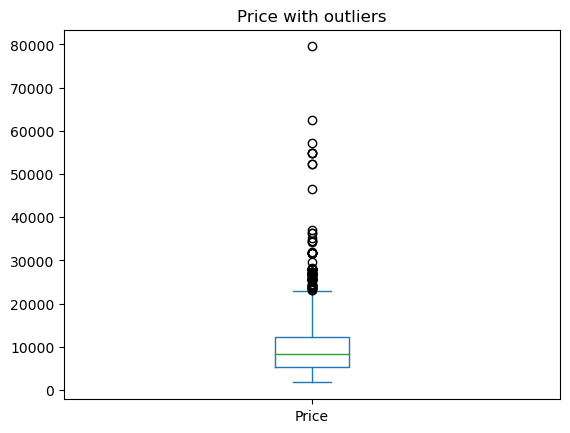

In [31]:
df['Price'].plot(kind='box')
plt.title("Price with outliers")
plt.show()

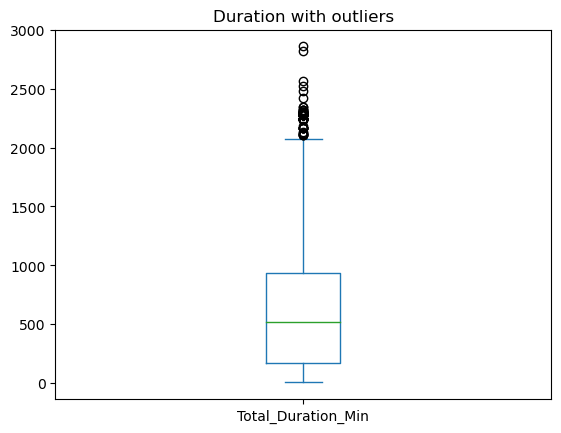

In [32]:
df['Total_Duration_Min'].plot(kind='box')
plt.title("Duration with outliers")
plt.show()

In [33]:
normalized_price = (df['Price'] - df['Price'].mean()) / df['Price'].std()

In [34]:
idx = abs(normalized_price) > 3
remove = df[idx].index

In [35]:
df_outliers_removed = df.drop(remove)

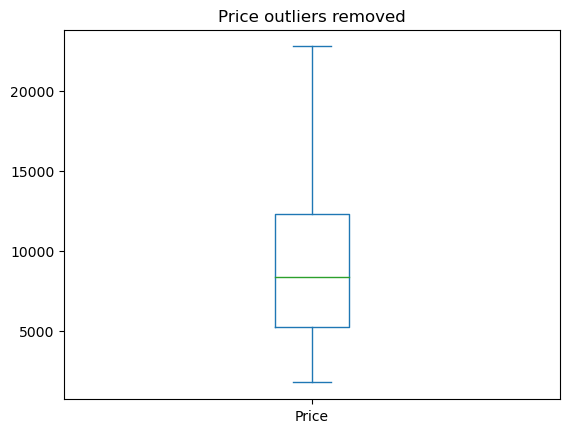

In [36]:
df_outliers_removed['Price'].plot(kind='box')
plt.title('Price outliers removed')
plt.show()

In [37]:
duration_normalized = (df_outliers_removed['Total_Duration_Min'] - df_outliers_removed['Total_Duration_Min'].mean()) / df_outliers_removed['Total_Duration_Min'].std()
idx = abs(duration_normalized) > 3
remove = df_outliers_removed[idx].index
df_outliers_removed.drop(remove, inplace=True)

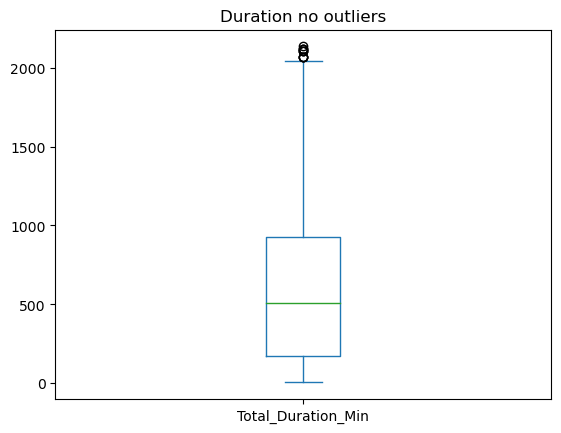

In [38]:
df_outliers_removed['Total_Duration_Min'].plot(kind='box')
plt.title("Duration no outliers")
plt.show()

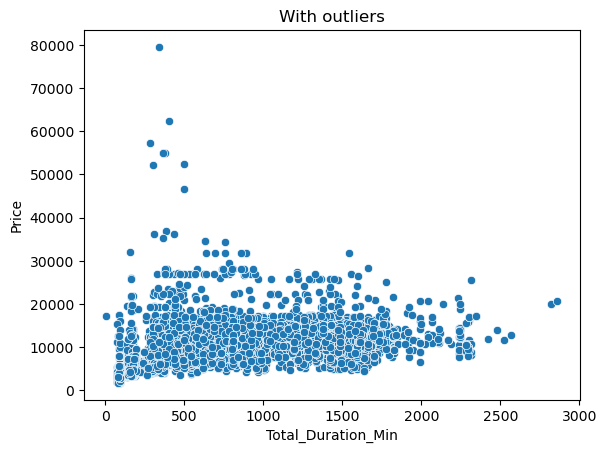

In [39]:
sns.scatterplot(y='Price',x='Total_Duration_Min', data=df)
plt.title('With outliers')
plt.show()

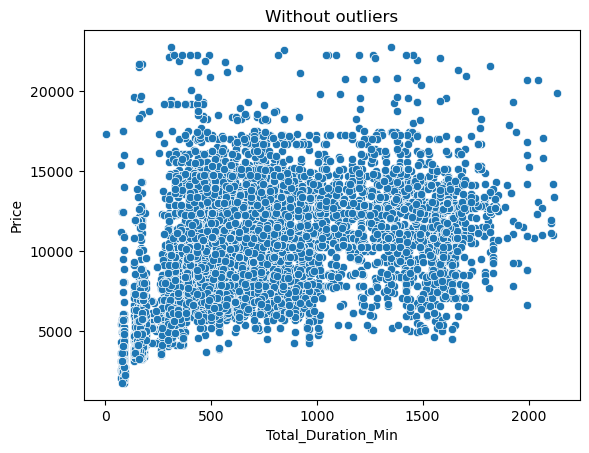

In [40]:
sns.scatterplot(y='Price',x='Total_Duration_Min', data=df_outliers_removed)
plt.title('Without outliers')
plt.show()

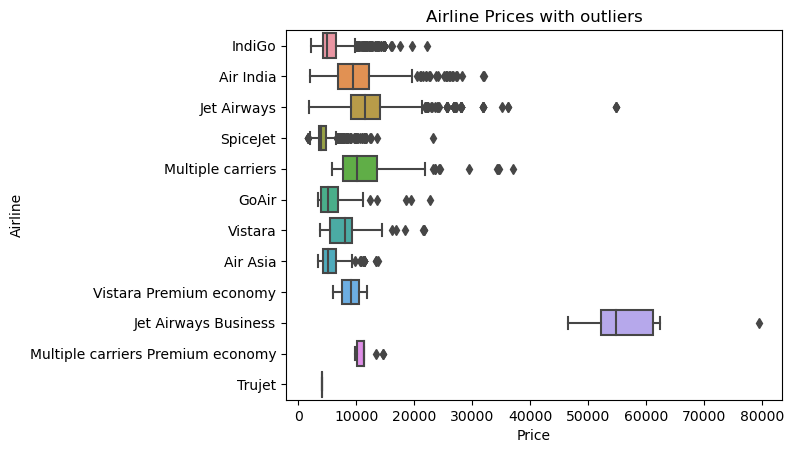

In [41]:
sns.boxplot(x='Price', y='Airline', data=df)
plt.title('Airline Prices with outliers')
plt.show()

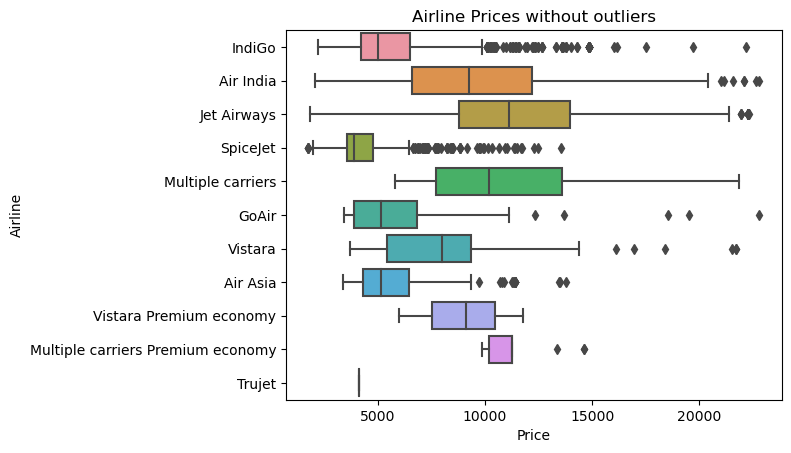

In [42]:
sns.boxplot(x='Price', y='Airline', data=df_outliers_removed)
plt.title('Airline Prices without outliers')
plt.show()

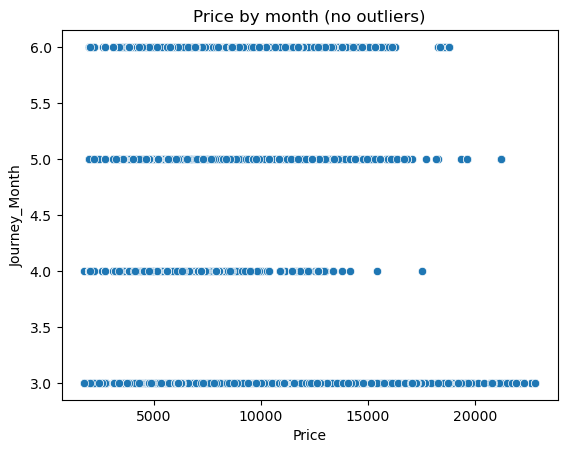

In [43]:
sns.scatterplot(x='Price', y='Journey_Month', data=df_outliers_removed)
plt.title('Price by month (no outliers)')
plt.show()

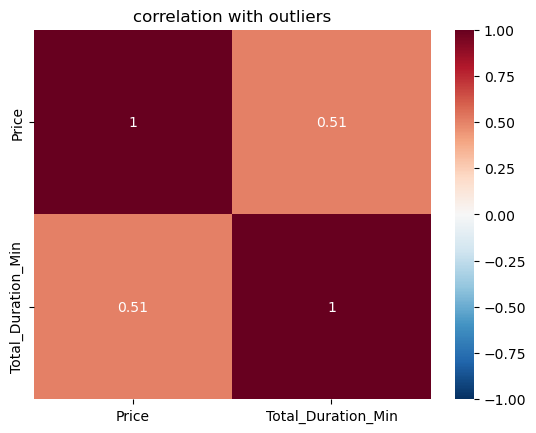

In [44]:
corr1 = df[['Price', 'Total_Duration_Min']].corr()
sns.heatmap(corr1,annot=True,vmin=-1,vmax=1, cmap='RdBu_r')
plt.title('correlation with outliers')
plt.show()

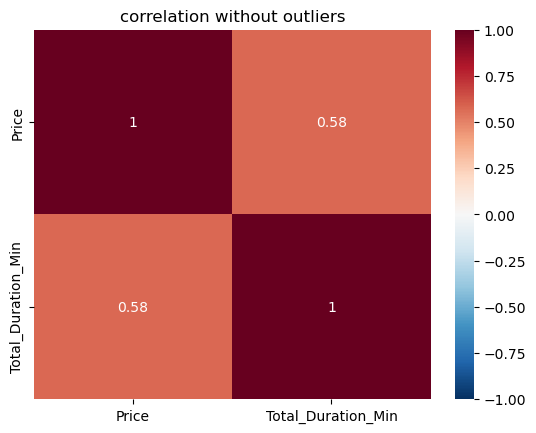

In [45]:
corr2 = df_outliers_removed[['Price', 'Total_Duration_Min']].corr()
sns.heatmap(corr2,annot=True,vmin=-1,vmax=1, cmap='RdBu_r')
plt.title('correlation without outliers')
plt.show()

In [46]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


## Dummy encoding

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10682 non-null  object
 1   Source              10682 non-null  object
 2   Destination         10682 non-null  object
 3   Total_Stops         10682 non-null  int32 
 4   Price               10682 non-null  int64 
 5   Journey_Day         10682 non-null  int64 
 6   Journey_Month       10682 non-null  int64 
 7   Journey_Year        10682 non-null  int64 
 8   Dep_Hour            10682 non-null  int64 
 9   Dep_Min             10682 non-null  int64 
 10  Arrival_Hour        10682 non-null  int64 
 11  Arrival_Min         10682 non-null  int64 
 12  Total_Duration_Min  10682 non-null  int64 
dtypes: int32(1), int64(9), object(3)
memory usage: 1.4+ MB


In [48]:
df_final = pd.get_dummies(df)
df_no_outlier = pd.get_dummies(df_outliers_removed)

In [49]:
df_final.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,445,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,1140,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,325,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,285,...,0,0,0,0,0,0,0,0,0,1


## linear regression

In [50]:
y = df_final['Price']
x = df_final.drop('Price',axis=1)

In [51]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=3)

In [52]:
reg = LinearRegression()

In [53]:
reg.fit(train_x,train_y)

LinearRegression()

In [54]:
predicted = reg.predict(test_x)

In [55]:
mean_squared_error(predicted, test_y)**0.5

2804.6350017981504

In [56]:
r2_score(reg.predict(train_x), train_y)

0.4067234057518524

<Axes: >

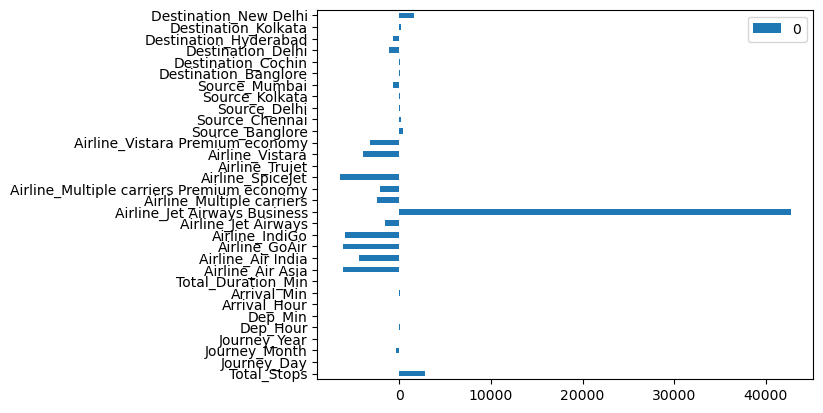

In [57]:
pd.DataFrame(reg.coef_,index=train_x.columns).plot(kind='barh')

### outliers removed

In [58]:
y2 = df_no_outlier['Price']
x2 = df_no_outlier.drop('Price',axis=1)

In [59]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.3, random_state=3)

In [60]:
reg2 = LinearRegression()

In [61]:
reg2.fit(train_x2,train_y2)

LinearRegression()

In [62]:
predict = reg2.predict(test_x2)

In [63]:
mean_squared_error(predict, test_y2)**0.5

2413.2350299104596

In [64]:
r2_score(predict, test_y2)

0.4658364204818627

In [65]:
improvement_reg = (2804.64-2413.24)/2804.64
'{:.2f}%'.format(improvement_reg*100)

'13.96%'

## Decision Tree Regression

In [66]:
rt = DecisionTreeRegressor()

In [67]:
rt.fit(train_x,train_y)

DecisionTreeRegressor()

In [68]:
predicted_rt = rt.predict(test_x)

In [69]:
mean_squared_error(predicted_rt,test_y)**0.5

2543.8988731369836

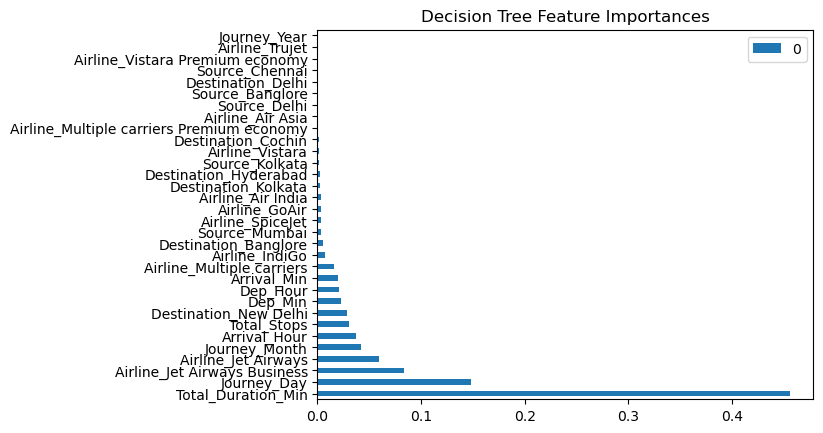

In [70]:
pd.DataFrame(rt.feature_importances_, index=train_x.columns).sort_values(by=0, ascending=False).plot(kind='barh')
plt.title("Decision Tree Feature Importances")
plt.show()

### outliers removed

In [71]:
rt2 = DecisionTreeRegressor()

In [72]:
rt2.fit(train_x2,train_y2)

DecisionTreeRegressor()

In [73]:
predicted_rt = rt2.predict(test_x2)

In [74]:
mean_squared_error(predicted_rt,test_y2)**0.5

2217.32219204318

In [75]:
improvement = (2539.68-2210.22)/2539.68
'{:.2f}%'.format(improvement*100)

'12.97%'

## KNN Regressor

In [76]:
knn = KNeighborsRegressor()

In [77]:
knn.fit(train_x,train_y)

KNeighborsRegressor()

In [78]:
predict_knn = knn.predict(test_x)

In [79]:
mean_squared_error(predict_knn, test_y)**0.5

3019.2037735029544

### outliers removed

In [80]:
knn2 = KNeighborsRegressor()

In [81]:
knn2.fit(train_x2,train_y2)

KNeighborsRegressor()

In [82]:
predict_knn2 = knn2.predict(test_x2)

In [83]:
mean_squared_error(predict_knn2, test_y2)**0.5

2404.6670081915877

In [84]:
improvement = (3019.20-2404.67)/3019.20
'{:.2f}%'.format(improvement*100)

'20.35%'